<a href="https://colab.research.google.com/github/Sumxt/Data-analytics-projects/blob/main/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

In [ ]:
CO2_df = pd.read_csv('archive.csv')
temp_by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('TemperaturesByState.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

In [ ]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [ ]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
temp_by_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping all NaN values
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

In [ ]:
# Modify the date format so I could only use the year
def to_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)


# Applying the date modification and creating a new column
# in the dataset called year
temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

# Collecting only data of the United States
dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year
dfa = pd.DataFrame()
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa = pd.concat([dfa,df_new],ignore_index=True)

<Axes: xlabel='year', ylabel='AverageTemperature'>

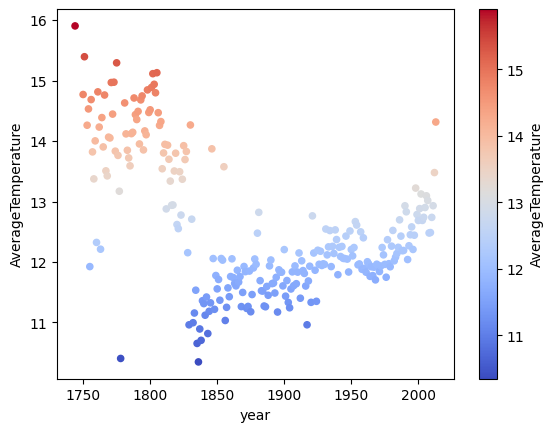

In [ ]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

<Axes: xlabel='year', ylabel='AverageTemperature'>

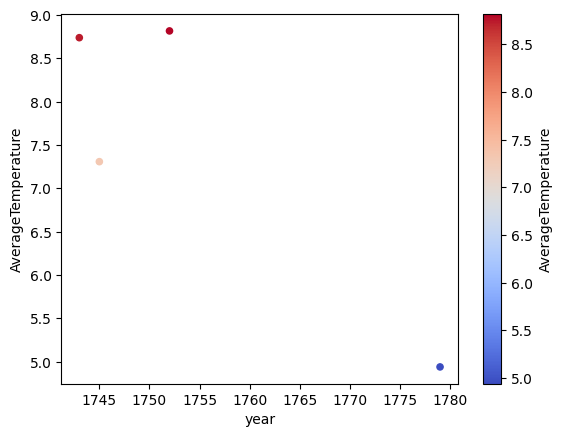

In [ ]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

In [ ]:
new_co2_df = CO2_df

In [ ]:
dfc = pd.DataFrame()

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['Year'] == i]).head(1)
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = pd.concat([dfc,df_new],ignore_index=True)

# Changing the Year column to year (lowercase)
dfc.rename(index=str, columns={"Year": "year"}, inplace=True)


# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)',
           'Carbon Dioxide Fit (ppm)',
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

In [ ]:
dfc = dfc.dropna()

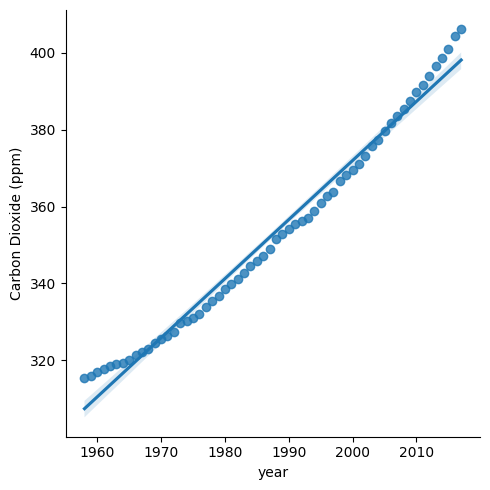

In [ ]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc)

<Axes: >

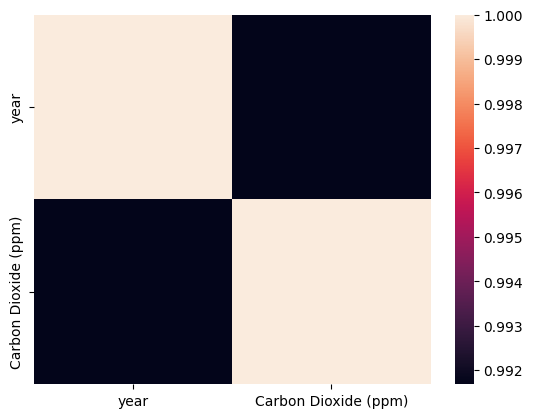

In [ ]:
sns.heatmap(dfc.corr())

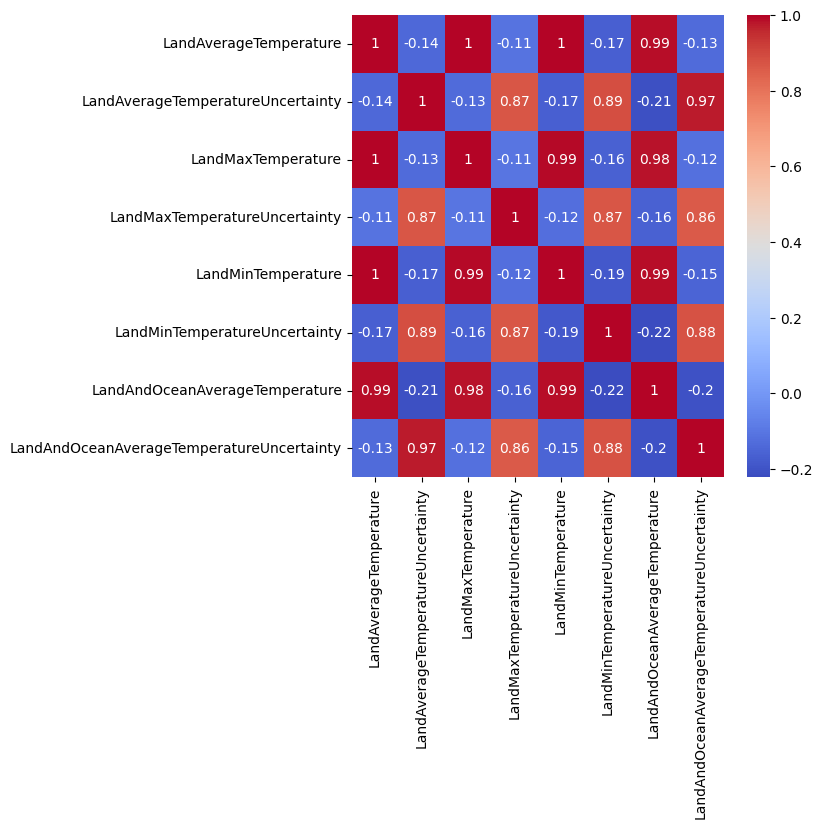

In [ ]:
# Select only numeric columns
global_temp_numeric = global_temp.select_dtypes(include=['number'])

# Generate heatmap
plt.figure(figsize=(6,6))
sns.heatmap(global_temp_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

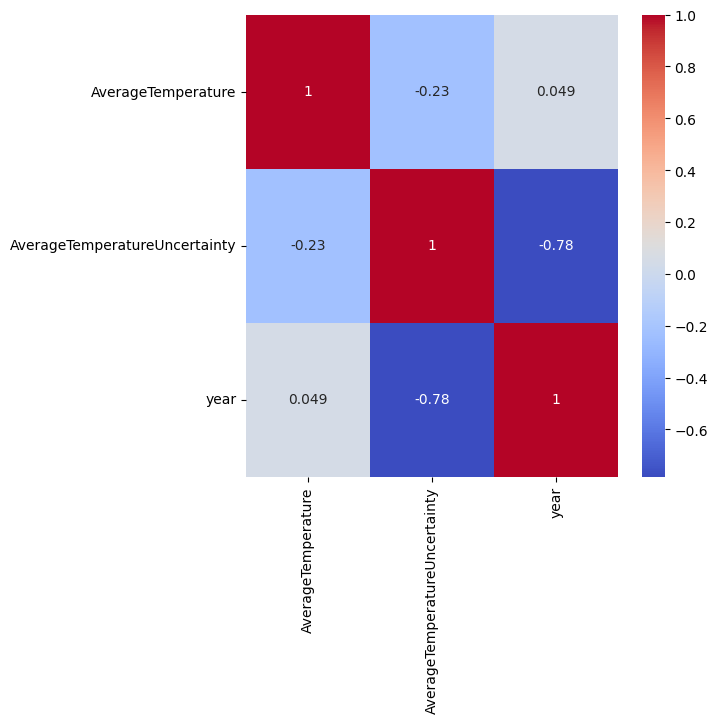

In [ ]:
# Keep only numeric columns
temp_by_state_numeric = temp_by_state.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(temp_by_state_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

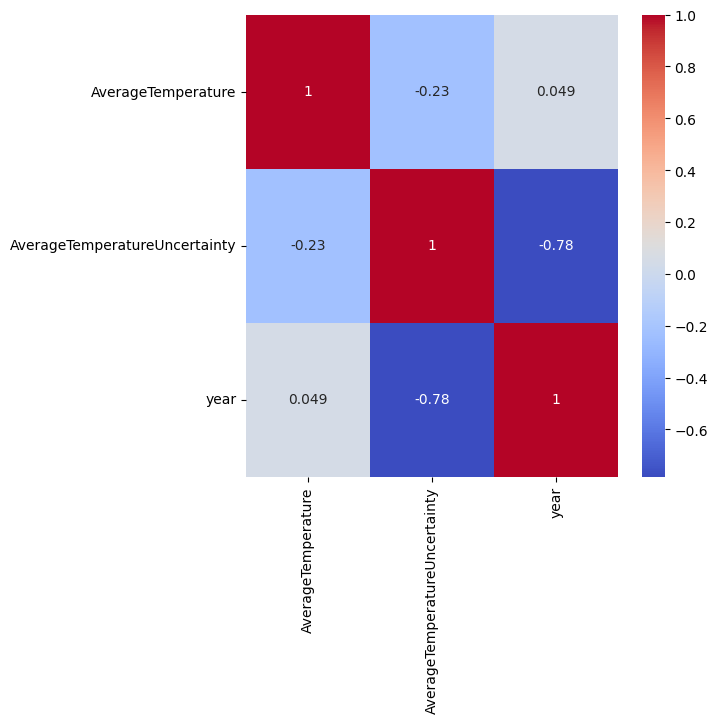

In [ ]:
# Keep only numeric columns
temp_by_state_numeric = temp_by_state.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(temp_by_state_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

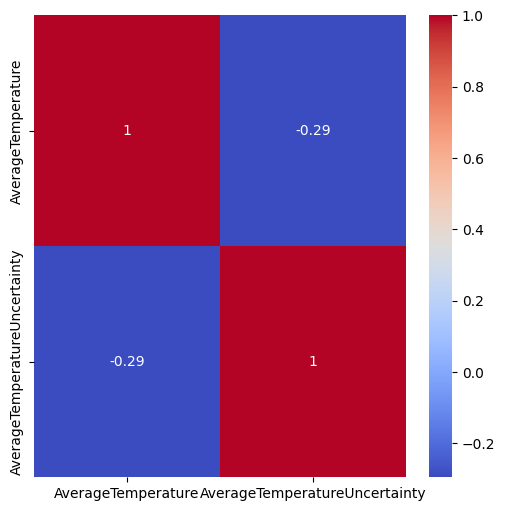

In [ ]:
# Keep only numeric columns
temp_by_country_numeric = temp_by_country.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(temp_by_country_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

In [ ]:
dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)',
           'Carbon Dioxide Fit (ppm)',
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

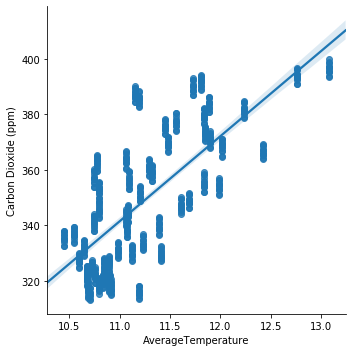

In [ ]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc)

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

In [ ]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

In [ ]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="EWM average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

In [ ]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ]

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  0.996044541845813


In [ ]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])

# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

In [ ]:
# State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

,116037
dt,2012-06-01
AverageTemperature,36.339
AverageTemperatureUncertainty,0.385
State,Delhi
Country,India
year,2012


In [ ]:
# Country that had the highest Average Temperature
# Kuwait (Western Asia)
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

,47551
dt,2012-07-01
AverageTemperature,37.471
AverageTemperatureUncertainty,0.554
Country,Bahrain


In [ ]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

,93812
dt,1781-02-01
AverageTemperature,-8.839
AverageTemperatureUncertainty,11.631
State,City Of St. Petersburg
Country,Russia
year,1781


In [ ]:
def mod_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)

In [ ]:
def mod_month(date):
    """
    returns month from date time
    """
    for i in [date]:
        second = i.split('-')[1]
        return int(second)

In [ ]:
temp_by_country['year'] = temp_by_country['dt'].apply(mod_year)
temp_by_country['month'] = temp_by_country['dt'].apply(mod_month)

In [ ]:
country_new_temp_data = pd.merge(temp_by_country, CO2_df, on=['year'])

In [52]:
# Convert "Carbon Dioxide (ppm)" column to numeric (force conversion)
country_new_temp_data["Carbon Dioxide (ppm)"] = pd.to_numeric(
    country_new_temp_data["Carbon Dioxide (ppm)"], errors="coerce"
)

# Now apply groupby and mean
country_carbon = country_new_temp_data.groupby(["year", "month"])["Carbon Dioxide (ppm)"].mean()
xx = [dt.datetime(year=i[0], month=i[1], day=15) for i in country_carbon.index]

# Mean values.
yy1 = country_carbon.values

# Rolling window average
yy2 = country_carbon.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
yy3 = country_carbon.ewm(span=3, min_periods=1).mean().values

In [53]:
second_country_trace = go.Scatter(x=xx, y=yy1, mode="markers", name="Actual value")
third_country_trace = go.Scatter(x=xx, y=yy2, line=dict(color="red"), name="Rolling average")
forth_country_trace = go.Scatter(x=xx, y=yy3, line=dict(color="green"), name="EWM average")

In [54]:
x_values = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_values = [ i for i in y1 ]

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_values)

Accuracy:  0.996044541845813


In [55]:
# country_new_temp_data['Country'].unique()
df1 = country_new_temp_data.groupby(['Country'])

In [56]:
df2= df1.apply(lambda x: x.sort_values(["Carbon Dioxide (ppm)"]))

<ipython-input-56-ef89e92dfa3d>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [57]:
df3=df2.reset_index(drop=True)
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-11-01,5.400,0.678,Afghanistan,1958,11,9,1958.7068,313.21,316.06,312.48,315.35
1,1958-12-01,4.662,0.439,Afghanistan,1958,12,9,1958.7068,313.21,316.06,312.48,315.35
2,1958-08-01,24.639,0.436,Afghanistan,1958,8,9,1958.7068,313.21,316.06,312.48,315.35
3,1958-09-01,21.086,0.463,Afghanistan,1958,9,9,1958.7068,313.21,316.06,312.48,315.35
4,1958-04-01,16.592,0.350,Afghanistan,1958,4,9,1958.7068,313.21,316.06,312.48,315.35


In [58]:
new_predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        new_predicted_x.append([y, j, j ** 2, y ** 2])

# Predict values
new_predicted_y = linearModel.predict(new_predicted_x)


new_x_plot = [dt.datetime(i[0], i[1], 15) for i in new_predicted_x]
fifth_new_trace = go.Scatter(x=new_x_plot , y=new_predicted_y, line=dict(color="red"), name="Predicted value")

layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_country_trace, fifth_new_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")